In [3]:
import numpy as np
import pandas as pd
# load mat file
import scipy

In [64]:
mat = scipy.io.loadmat('datasets/irmdata/dnations.mat')

# set nan to 0
d = mat['R']
d[np.isnan(d)] = 1
d.shape

(14, 14, 56)

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import sys

sys.path.append("/Users/aleix11alcacer/Projects/archetypes")

In [26]:
from archetypes.algorithms.torch import NAA
from models import BiAA, DBiAA
import torch

In [27]:
data = torch.tensor(d).float().reshape(d.shape)

model = NAA((5, 5, 18), d.shape, relations=[0, 0, 1], degree_correction=False, loss="normal")

model.fit(data, n_epochs=4_000, learning_rate=0.01)

  0%|          | 0/4000 [00:00<?, ?it/s]

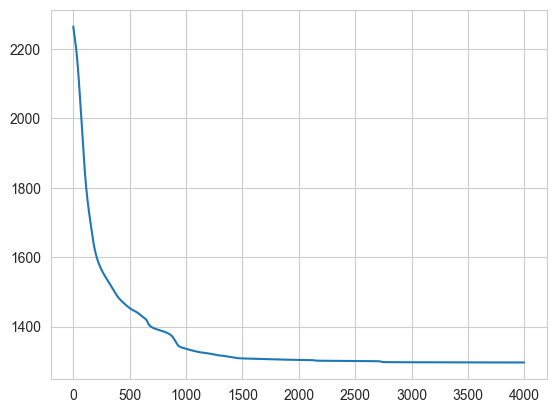

In [28]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.show()

In [29]:
from archetypes.visualization import heatmap
from archetypes.datasets import sort_by_archetype_similarity

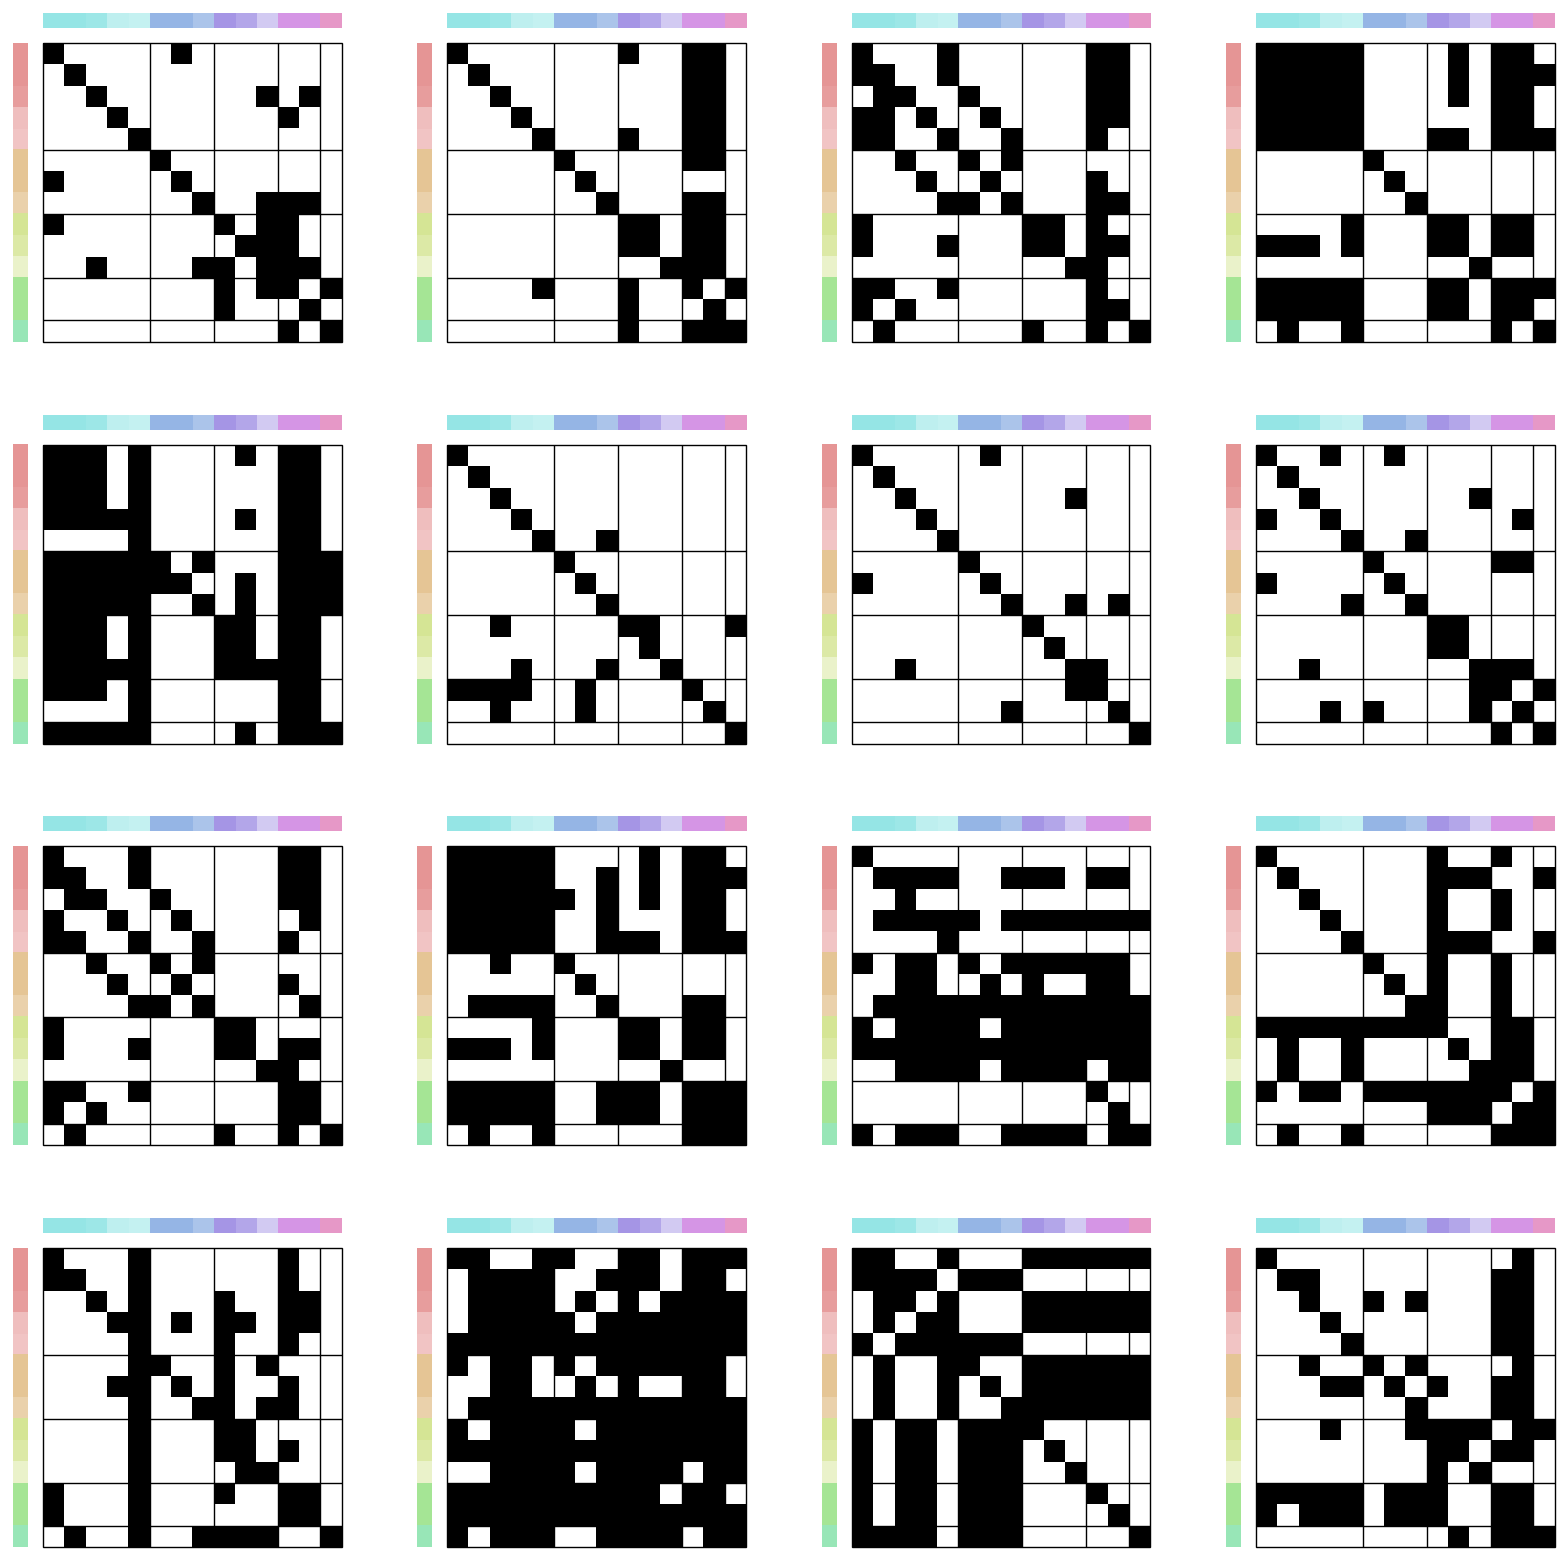

In [30]:
alphas = [a.detach().numpy() for a in model.A]
estimated_archetypes = model.Z.detach().numpy()

rand_i = np.random.choice(data.shape[2], 16, replace=False)

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, rand_i[i]], alphas[0:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)

plt.show()

In [56]:
_, info_s = sort_by_archetype_similarity(data[0, :, :], alphas[1:3], estimated_archetypes[0, :, :])

countries = np.array([c[0] for c in mat["countrynames"][0]])[info_s["perms"][0]]
labels = info_s["labels"][0]
scores = info_s["scores"][0]
df = pd.DataFrame({"country": countries, "label": labels, "score": scores})

In [57]:
for _, group in df.groupby("label"):
    print(group)
    print("----")

       country  label     score
0       Israel      0  0.999748
1       Brazil      0  0.999538
2        India      0  0.920102
3        Egypt      0  0.613012
4  Netherlands      0  0.548150
----
     country  label     score
5      Burma      1  0.999691
6     Jordan      1  0.999143
7  Indonesia      1  0.792780
----
   country  label     score
8     USSR      2  0.999727
9   Poland      2  0.838393
10   China      2  0.498007
----
   country  label     score
11     USA      3  0.999638
12      UK      3  0.999579
----
   country  label     score
13    Cuba      4  0.967886
----


In [72]:
_, info_s = sort_by_archetype_similarity(data[0, :, :], alphas[1:3], estimated_archetypes[0, :, :])

relations = np.array([c[0] for c in mat["relnnames"][0]])[info_s["perms"][1]]
labels = info_s["labels"][1]
scores = info_s["scores"][1]
df = pd.DataFrame({"relations": relations, "label": labels, "score": scores})

In [73]:
for _, group in df.groupby("label"):
    print(group)
    print("----")

           relations  label     score
0   militaryalliance      0  0.899364
1        commonbloc2      0  0.635102
2           tourism3      0  0.471556
3          emigrants      0  0.464807
4        relstudents      0  0.449973
5            tourism      0  0.435044
6            exports      0  0.389709
7           students      0  0.376758
8         reltourism      0  0.371813
9         emigrants3      0  0.354764
10      relemigrants      0  0.351408
11       conferences      0  0.328091
----
          relations  label     score
12        dependent      1  0.852729
13   violentactions      1  0.669099
14     timesincewar      1  0.668433
15         duration      1  0.664363
16  militaryactions      1  0.658700
----
           relations  label     score
17    boycottembargo      2  0.733877
18      negativecomm      2  0.527108
19  negativebehavior      2  0.474055
20        accusation      2  0.413721
----
          relations  label     score
21           relngo      3  0.999261
22  r